In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import dplypy.dplypy as dp

In [14]:
df = dp.DplyFrame(sns.load_dataset("titanic"))

test_df_1 = df.head(5)
test_df_2 = df.tail(5)
test_df_3 = dp.DplyFrame(
    test_df_1.pandas_df.loc[:, ["survived", "pclass", "age", "sibsp"]]
)
test_df_4 = dp.DplyFrame(
    test_df_2.pandas_df.loc[:, ["survived", "pclass", "age", "sibsp"]]
)

# melt + pivot_table

In [15]:
test1 = (
    test_df_1
    + dp.melt(id_vars=["who"], value_vars=["fare"])
    + dp.pivot_table(index=["who"], values=["value"], aggfunc=min)
)

In [16]:
test1

       value
who         
man    7.250
woman  7.925

# one_hot + write_file

In [17]:
test2 = test_df_1 + dp.one_hot(columns=["embarked"]) + dp.write_file("one_hot.csv")

# drop + fill_na + count_null

In [18]:
test_3 = (
    test_df_1
    + dp.drop(labels=["survived", "pclass"], axis=1)
    + dp.fill_na(value={"deck": "A"})
    + dp.count_null("deck")
)

In [19]:
(
    test_df_1
    + dp.drop(labels=["survived", "pclass"], axis=1)
    + dp.fill_na(value={"deck": "A"})
    + dp.count_null("deck")
)

0

# query + apply

In [20]:
test_4 = test_df_3 + dp.select("age > 25") + dp.mutate(lambda b: b + 100)

In [21]:
test_df_3 + dp.query("age > 25") + dp.apply(lambda b: b + 100)

   survived  pclass    age  sibsp
1       101     101  138.0    101
2       101     103  126.0    100
3       101     101  135.0    101
4       100     103  135.0    100

# merge + drop_na

In [22]:
test_5 = test_df_3 + dp.merge(test_df_4, on="pclass", how="outer") + dp.drop_na()

In [23]:
test_df_3 + dp.merge(test_df_4, on="pclass", how="outer") + dp.drop_na()

   survived_x  pclass  age_x  sibsp_x  survived_y  age_y  sibsp_y
1         0.0       3   22.0      1.0           0   32.0        0
3         1.0       3   26.0      0.0           0   32.0        0
5         0.0       3   35.0      0.0           0   32.0        0
6         1.0       1   38.0      1.0           1   19.0        0
7         1.0       1   38.0      1.0           1   26.0        0
8         1.0       1   35.0      1.0           1   19.0        0
9         1.0       1   35.0      1.0           1   26.0        0

# filter + arrange

In [24]:
test_6 = test_df_3 + dp.filter(test_df_3["survived"] == 1) + dp.arrange(by=["age"])

In [25]:
test_6

   survived  pclass   age  sibsp
2         1       3  26.0      0
3         1       1  35.0      1
1         1       1  38.0      1

     survived  pclass     sex    age  sibsp  parch      fare embarked   class    who  adult_male deck  embark_town alive  alone
1           1       1  female  38.00      1      0   71.2833        C   First  woman       False    C    Cherbourg   yes  False
3           1       1  female  35.00      1      0   53.1000        S   First  woman       False    C  Southampton   yes  False
6           0       1    male  54.00      0      0   51.8625        S   First    man        True    E  Southampton    no   True
10          1       3  female   4.00      1      1   16.7000        S   Third  child       False    G  Southampton   yes  False
11          1       1  female  58.00      0      0   26.5500        S   First  woman       False    C  Southampton   yes   True
21          1       2    male  34.00      0      0   13.0000        S  Second    man        True    D  Southampton   yes   True
23          1       1    male  28.00      0      0   35.5000        S   First    man        True    A  S

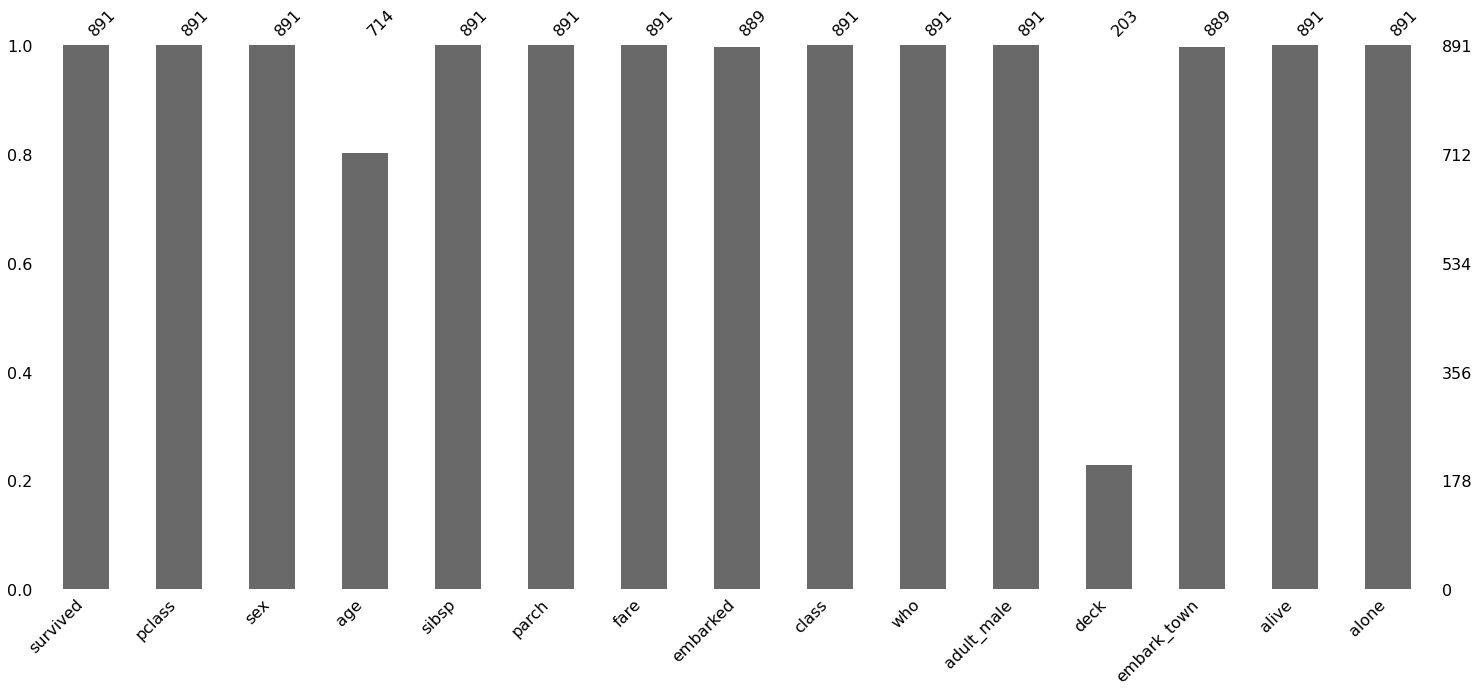

In [39]:
import missingno


def visualize_missing(df):
    missingno.bar(df.pandas_df)


df + dp.side_effect(visualize_missing) + dp.drop_na() + dp.write_file("output.csv")